# Problem 3

In [1]:
import numpy as np
import seaborn as sns

from numpy.linalg import eig
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [2]:
def run_implemented_pca(X_train, X_test, n_components):
    # calculate the mean of each column
    mean = np.mean(X_train, axis=0)
    # center columns by subtracting column means
    X_train_centered = X_train - mean
    X_test_centered = X_test - mean
    # calculate covariance matrix of centered matrix
    covariance_matrix = np.cov(X_train_centered.T)
    # eigendecomposition of covariance matrix
    values, vectors = eig(covariance_matrix)
    # project data
    X_train_projected = vectors.T.dot(X_train_centered.T)
    X_test_projected = vectors.T.dot(X_test_centered.T)

    X_train_projected = X_train_projected.T
    X_test_projected = X_test_projected.T
    return X_train_projected[:,:n_components], X_test_projected[:,:n_components]

def plot_confusion_matrix(validations, predictions):
    """ Plot confusion matrix and compare real labels with predicted labels. """

    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(10, 5))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [3]:
(X_train, y_train) , (X_test, y_test)= fashion_mnist.load_data()
X_train = normalize(X_train.flatten().reshape(60000, 784))
X_test = normalize(X_test.flatten().reshape(10000, 784))
LABELS = set(y_train)

print('X_train shape -', X_train.shape)
print('y_train shape -', y_train.shape)
print('Labels -', ', '.join([str(label) for label in LABELS]))

X_train shape - (60000, 784)
y_train shape - (60000,)
Labels - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9


### D=5 features on MNIST

In [4]:
X_train_pca, X_test_pca = run_implemented_pca(X_train, X_test, 5)
lr = LogisticRegression(max_iter=100).fit(X_train_pca, y_train)
predictions = lr.predict(X_test_pca)
print('accuracy on MNIST after PCA with 5 components -', accuracy_score(y_test, predictions))

accuracy on MNIST after PCA with 5 components - 0.6614


### D=20 features on MNIST

In [5]:
X_train_pca, X_test_pca = run_implemented_pca(X_train, X_test, 20)
lr = LogisticRegression(max_iter=100).fit(X_train_pca, y_train)
predictions = lr.predict(X_test_pca)
print('accuracy on MNIST after PCA with 20 components -', accuracy_score(y_test, predictions))

accuracy on MNIST after PCA with 20 components - 0.7931


### Accuracy Plot

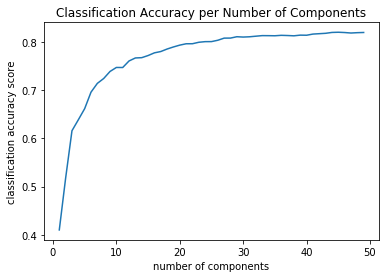

In [6]:
components_nums, accuracy_scores = [], []
for n_components in range(1, 50):
    X_pca_train, X_pca_test = run_implemented_pca(X_train, X_test, n_components)
    lr = LogisticRegression(max_iter=100).fit(X_pca_train, y_train)
    predictions = lr.predict(X_pca_test)
    components_nums.append(n_components)
    accuracy_scores.append(accuracy_score(y_test, predictions))

plt.title('Classification Accuracy per Number of Components')
plt.xlabel('number of components')
plt.ylabel('classification accuracy score')
plt.plot(components_nums, accuracy_scores)